## 1) Problem Definition
#### The objective of this project is to develop a machine learning model that predicts the salary of an employee using their experience level.The dataset contains employee records with fields such as employee ID and experience level,where experience level is used as the key predictive factor. Employee ID id used only for identification and not for learning patterns.The model aims to help HR or employers estimate an employee's salary based on their experience,ensuring faster and more consistent salary decisions.

## 2) importing required libraries

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 3) load dataset

In [22]:
data=pd.read_csv(r"C:\Users\navee\OneDrive\Documents\Salary_dataset.csv")
data.head(5)

,emp_id,YearsExperience,Salary
0,1,1.4,46206
1,2,1.6,37732
2,3,2.1,43526
3,4,2.3,39892
4,5,3.0,56643


## 4) Data understanding

In [23]:
#checking the column names
data.columns

Index(['emp_id', 'YearsExperience', 'Salary'], dtype='object')

In [24]:
#checking the total number of rows and columns
data.shape

(29, 3)

In [25]:
#checking the data types of the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   emp_id           29 non-null     int64  
 1   YearsExperience  29 non-null     float64
 2   Salary           29 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 824.0 bytes


In [26]:
#checking the statistical operations of all columns
data.describe()

,emp_id,YearsExperience,Salary
count,29.000000,29.000000,29.000000
mean,15.000000,5.558621,77268.137931
std,8.514693,2.772250,26995.157605
min,1.000000,1.400000,37732.000000
25%,8.000000,3.300000,56958.000000
50%,15.000000,5.000000,66030.000000
75%,22.000000,8.000000,101303.000000
max,29.000000,10.600000,122392.000000


In [27]:
#detecting if there are null values or not
data.isnull().sum()

emp_id             0
YearsExperience    0
Salary             0
dtype: int64

## 5) Data visualisation

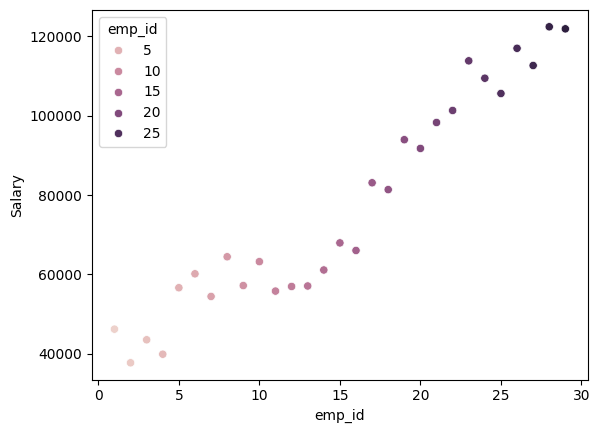

In [28]:
# visualising relationship between emp_id and salary
sns.scatterplot(x="emp_id",y="Salary",data=data,hue="emp_id")
plt.show()

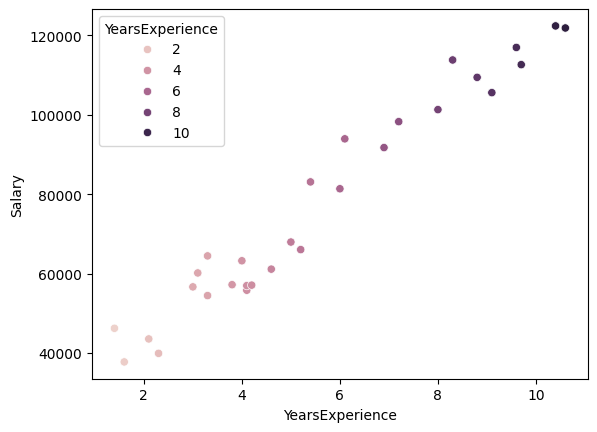

In [29]:
# visualising relationship between Years of experience and salary
sns.scatterplot(x="YearsExperience",y="Salary",data=data,hue="YearsExperience")
plt.show()

In [30]:
#checking correlation between the columns through corr()
data.corr()

,emp_id,YearsExperience,Salary
emp_id,1.000000,0.985723,0.959422
YearsExperience,0.985723,1.000000,0.977022
Salary,0.959422,0.977022,1.000000


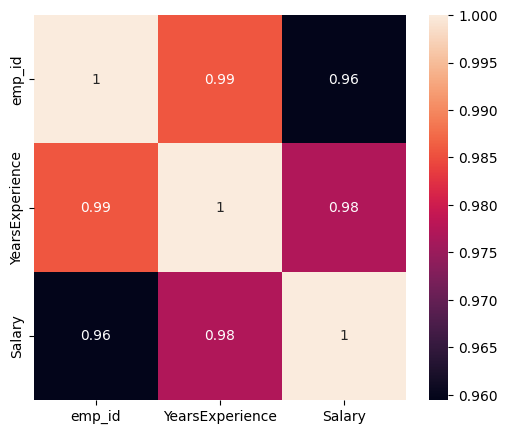

In [31]:
#visualising correlation through heatmap
plt.figure(figsize=(6,5))
sns.heatmap(data=data.corr(),annot=True)
plt.show()

In [32]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
outliers=((data<q1-1.5*IQR) | (data>q3+1.5*IQR)).sum()
outliers

emp_id             0
YearsExperience    0
Salary             0
dtype: int64

## 6)Train-Test Split

In [33]:
x=data[["emp_id","YearsExperience"]]
y=data["Salary"]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
lr1=LinearRegression()
lr1.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 7)coefficient and intercept

In [36]:
print("intercept:",lr1.intercept_)
print("coefficient:",lr1.coef_)

intercept: 23961.974430213624
coefficient: [ -585.24520802 11102.49986243]


## 8)model prediction

In [37]:
y_pred=lr1.predict(x_test)

## 9) model evaluation

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [39]:
print("mean_squared_error:",mean_squared_error(y_test,lr1.predict(x_test)))
print("mean_absolute_error:",mean_absolute_error(y_test,lr1.predict(x_test)))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,lr1.predict(x_test))))
print("R2 Score:",r2_score(y_test,lr1.predict(x_test)))

mean_squared_error: 42864136.4861992
mean_absolute_error: 5204.791650617052
root mean squared error: 6547.070832532607
R2 Score: 0.9392015211424422


<Figure size 2500x800 with 0 Axes>

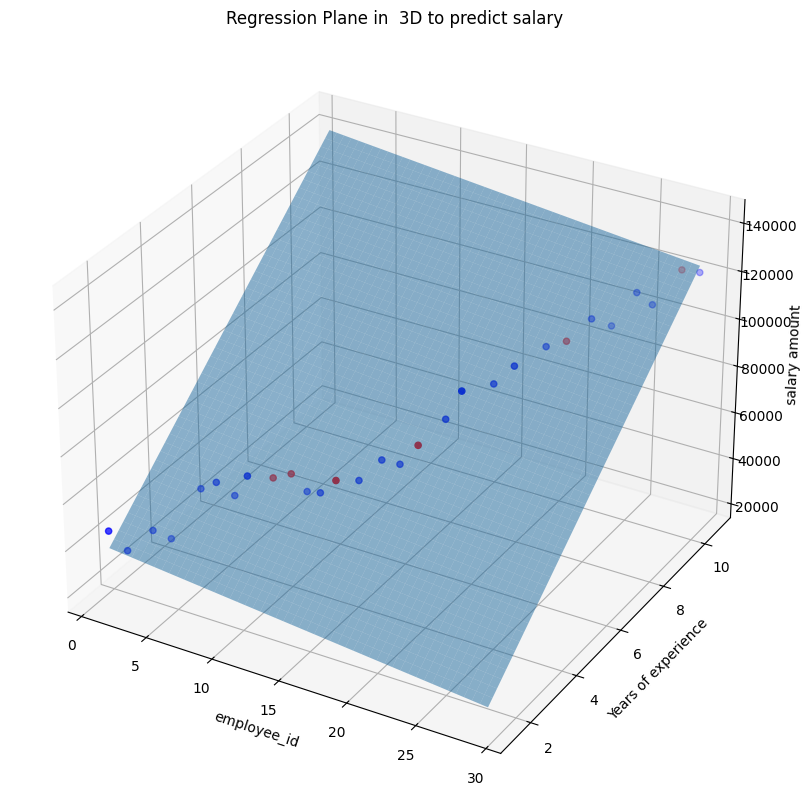

In [40]:
# 4. Prepare grid for plane
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(25,8))
x_surf, y_surf = np.meshgrid(
    np.linspace(x.iloc[:,0].min(), x.iloc[:,0].max(), 50),
    np.linspace(x.iloc[:,1].min(), x.iloc[:,1].max(), 50)
)

# Plane equation: Z = b0 + b1*x + b2*y
z_surf = lr1.intercept_ + lr1.coef_[0]*x_surf + lr1.coef_[1]*y_surf

# 5. Plot 3D plane
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual points
ax.scatter(x_train.iloc[:,0], x_train.iloc[:,1], y_train,color='blue',label="Actual Points")
ax.scatter(x_test.iloc[:,0], x_test.iloc[:,1], y_pred,color='red',label="Predicted test points")

# Plot plane
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5)

ax.set_xlabel("employee_id")
ax.set_ylabel("Years of experience")
ax.set_zlabel("salary amount")
ax.set_title("Regression Plane in  3D to predict salary")
plt.show()